In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from scipy.stats import poisson
import numpy as np
import scipy.stats as stats
import re

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# weather
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import meteostat
from meteostat import Point, Daily, Stations, Hourly


In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/rugby/rugby'

In [3]:
raw_df = pd.read_csv("0_data/match_data/all_matches.csv")
raw_df

,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,home_differents_nationalities_for_all_the_team,home_jiff_players___read_jiff_study_in_top_14_,home_team,away_pack_weight_average,away_forwards_average_age,...,mins_of_away_red_cards,match_result,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome
0,901 kg (112.63 kg),27,28,198,France : 27% (4/15) England : 13% (2/15) Fiji ...,France : 43% (10/23) Fiji : 13% (3/23) Georgia...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,BIARRITZ,943 kg (117.88 kg),30,...,NaN,27 - 15,2021-09-04,2021-09-04 14:00:00,27,15,901,943,21/22,1
1,949 kg (118.63 kg),28,25,198,France : 40% (6/15) England : 13% (2/15) Fiji ...,France : 39% (9/23) Georgia : 17% (4/23) Fiji ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 8 / 15...,BRIVE,917 kg (114.63 kg),30,...,NaN,36 - 15,2021-09-04,2021-09-04 16:05:00,36,15,949,917,21/22,1
2,942 kg (117.75 kg),28,28,198,France : 40% (6/15) Fiji : 13% (2/15) Tonga : ...,France : 43% (10/23) South Africa : 9% (2/23) ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,CASTRES,913 kg (114.13 kg),28,...,NaN,16 - 12,2021-09-04,2021-09-04 16:05:00,16,12,942,913,21/22,1
3,927 kg (115.88 kg),28,25,202,France : 47% (7/15) Tonga : 13% (2/15) Fiji : ...,France : 52% (12/23) South Africa : 13% (3/23)...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,PARIS,899 kg (112.38 kg),28,...,NaN,21 - 36,2021-09-04,2021-09-04 18:15:00,21,36,927,899,21/22,-1
4,957 kg (119.63 kg),29,24,202,France : 60% (9/15) South Africa : 13% (2/15) ...,France : 65% (15/23) Samoa : 9% (2/23) South A...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,TOULON,920 kg (115.00 kg),29,...,NaN,24 - 24,2021-09-04,2021-09-04 21:05:00,24,24,957,920,21/22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,NaN,NaN,NaN,PAU,0,0,...,NaN,12:00 AM,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0
2025,0,0,0,0,NaN,NaN,NaN,MONTPELLIER,0,0,...,NaN,12:00 AM,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0
2026,0,0,0,0,NaN,NaN,NaN,LYON,0,0,...,NaN,12:00 AM,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0
2027,0,0,0,0,NaN,NaN,NaN,BAYONNE,0,0,...,NaN,12:00 AM,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0


In [8]:
raw_df = raw_df.loc[raw_df['match_date_dt'] < "2024-12-10"]

# raw_df.loc[raw_df['match_date_dt'] == "2024-11-30", "home_score"] = np.nan
# raw_df.loc[raw_df['match_date_dt'] == "2024-11-30", "away_score"] = np.nan

raw_df['home_team'] = [i.strip() for i in raw_df['home_team']]
raw_df['away_team'] = [i.strip() for i in raw_df['away_team']]


raw_df.tail(8)

,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,home_differents_nationalities_for_all_the_team,home_jiff_players___read_jiff_study_in_top_14_,home_team,away_pack_weight_average,away_forwards_average_age,...,mins_of_away_red_cards,match_result,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome
1735,0,0,0,0,NaN,NaN,NaN,STORMERS,0,0,...,NaN,4:15 PM,2024-12-07,2024-12-07 16:15:00,0,0,0,0,24/25,0
1736,0,0,0,0,NaN,NaN,NaN,SARACENS,0,0,...,NaN,6:30 PM,2024-12-07,2024-12-07 18:30:00,0,0,0,0,24/25,0
1737,0,0,0,0,NaN,NaN,NaN,MUNSTER,0,0,...,NaN,6:30 PM,2024-12-07,2024-12-07 18:30:00,0,0,0,0,24/25,0
1738,0,0,0,0,NaN,NaN,NaN,GLASGOW,0,0,...,NaN,9:00 PM,2024-12-07,2024-12-07 21:00:00,0,0,0,0,24/25,0
1739,0,0,0,0,NaN,NaN,NaN,RACING 92,0,0,...,NaN,9:00 PM,2024-12-07,2024-12-07 21:00:00,0,0,0,0,24/25,0
1740,0,0,0,0,NaN,NaN,NaN,BORDEAUX,0,0,...,NaN,2:00 PM,2024-12-08,2024-12-08 14:00:00,0,0,0,0,24/25,0
1741,0,0,0,0,NaN,NaN,NaN,TOULOUSE,0,0,...,NaN,4:15 PM,2024-12-08,2024-12-08 16:15:00,0,0,0,0,24/25,0
1742,0,0,0,0,NaN,NaN,NaN,BRISTOL,0,0,...,NaN,6:30 PM,2024-12-08,2024-12-08 18:30:00,0,0,0,0,24/25,0


In [9]:
raw_df.columns

Index(['home_pack_weight_average', 'home_forwards_average_age',
       'home_backs_average_age', 'home_tallest_player',
       'home_differents_nationalities_for_starters',
       'home_differents_nationalities_for_all_the_team',
       'home_jiff_players___read_jiff_study_in_top_14_', 'home_team',
       'away_pack_weight_average', 'away_forwards_average_age',
       'away_backs_average_age', 'away_tallest_player',
       'away_differents_nationalities_for_starters',
       'away_differents_nationalities_for_all_the_team',
       'away_jiff_players___read_jiff_study_in_top_14_', 'away_team',
       'stadium', 'match_date', 'match_time_french', 'home_n_tries',
       'home_n_conversions', 'home_n_pen_kicks', 'home_n_pen_tries',
       'away_n_tries', 'away_n_conversions', 'away_n_pen_kicks',
       'away_n_pen_tries', 'mins_of_home_tries', 'mins_of_home_conversions',
       'mins_of_home_pen_kicks', 'mins_of_home_pen_tries',
       'mins_of_away_tries', 'mins_of_away_conversions',
    

In [12]:
raw_df[['match_date_dt', 'home_team', 'away_team', 
    'home_score', 'away_score', 'outcome']]

,match_date_dt,home_team,away_team,home_score,away_score,outcome
0,2021-09-04,BIARRITZ,BORDEAUX,27,15,1
1,2021-09-04,BRIVE,PERPIGNAN,36,15,1
2,2021-09-04,CASTRES,PAU,16,12,1
3,2021-09-04,PARIS,RACING 92,21,36,-1
4,2021-09-04,TOULON,MONTPELLIER,24,24,0
...,...,...,...,...,...,...
1738,2024-12-07,GLASGOW,SALE,0,0,0
1739,2024-12-07,RACING 92,HARLEQUINS,0,0,0
1740,2024-12-08,BORDEAUX,LEICESTER,0,0,0
1741,2024-12-08,TOULOUSE,ULSTER,0,0,0


In [13]:
raw_df['outcome'].value_counts()

outcome
 1    1183
-1     515
 0      45
Name: count, dtype: int64

In [17]:
features = ['match_date_dt', 'home_team', 'away_team', 'season',
            'home_score', 'away_score', 'outcome',
            
            'home_n_tries', 'away_n_tries', 
            'home_n_conversions', 'away_n_conversions',
            'home_n_pen_kicks', 'away_n_pen_kicks',
            'home_n_pen_tries', 'away_n_pen_tries', 

            
            'home_forwards_average_age', 'home_backs_average_age',
            'away_forwards_average_age', 'away_backs_average_age',
            'home_tallest_player', 'home_pack_weight_kg',
            'away_tallest_player', 'away_pack_weight_kg'
           ]

# home data
home_data = raw_df[features].copy()

home_data['team_location'] = "Home"
home_data.rename(columns={"home_team": "team",
                    "away_team": "opponents",
                    "home_score": "team_score",
                    "away_score": "opponent_score",

                    "home_n_tries": "tries_scored",
                    "away_n_tries": "tries_conceded",
                    "home_n_conversions": "conversions_scored",
                    "away_n_conversions": "conversions_conceded",
                    "home_n_pen_kicks": "pen_kicks_scored",
                    "away_n_pen_kicks": "pen_kicks_conceded",
                    "home_n_pen_tries": "pen_tries_scored",
                    "away_n_pen_tries": "pen_tries_conceded",
                    
                    "home_forwards_average_age": "team_forwards_average_age",
                    "home_backs_average_age": "team_backs_average_age",
                    "away_forwards_average_age": "opposition_forwards_average_age",
                    "away_backs_average_age": "opposition_backs_average_age",

                    "home_tallest_player": "team_tallest_player",
                    "away_tallest_player": "opposition_tallest_player",

                    "home_pack_weight_kg": "team_pack_weight_kg",
                    "away_pack_weight_kg": "opposition_pack_weight_kg"
                    },
                    inplace=True)

# away data
away_data = raw_df[features].copy()
away_data['team_location'] = "Away"
away_data.rename(columns={"away_team": "team",
                    "home_team": "opponents",
                    "away_score": "team_score",
                    "home_score": "opponent_score",
                    "away_n_tries": "tries_scored",
                    "home_n_tries": "tries_conceded",
                    "away_n_conversions": "conversions_scored",
                    "home_n_conversions": "conversions_conceded",
                    "away_n_pen_kicks": "pen_kicks_scored",
                    "home_n_pen_kicks": "pen_kicks_conceded",
                    "away_n_pen_tries": "pen_tries_scored",
                    "home_n_pen_tries": "pen_tries_conceded",

                    "away_forwards_average_age": "team_forwards_average_age",
                    "away_backs_average_age": "team_backs_average_age",
                    "home_forwards_average_age": "opposition_forwards_average_age",
                    "home_backs_average_age": "opposition_backs_average_age",

                    "away_tallest_player": "team_tallest_player",
                    "home_tallest_player": "opposition_tallest_player",

                    "away_pack_weight_kg": "team_pack_weight_kg",
                    "home_pack_weight_kg": "opposition_pack_weight_kg"

                    },
                    inplace=True)

# concat dfs together
df = pd.concat([home_data, away_data])

df = df.sort_values(by='match_date_dt').reset_index(drop=False, names='match_per_row_index')

# df['tries_scored'] = df['tries_scored'] - df['pen_tries_scored']

df['conversions_scored'] = df['conversions_scored'] + df['pen_tries_scored']

df.tail(10)

,match_per_row_index,match_date_dt,team,opponents,season,team_score,opponent_score,outcome,tries_scored,tries_conceded,...,pen_tries_conceded,team_forwards_average_age,team_backs_average_age,opposition_forwards_average_age,opposition_backs_average_age,team_tallest_player,team_pack_weight_kg,opposition_tallest_player,opposition_pack_weight_kg,team_location
3476,1734,2024-12-07,NORTHAMPTON,CASTRES,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3477,1733,2024-12-07,SHARKS,EXETER,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3478,1732,2024-12-07,CLERMONT,BENETTON,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3479,1738,2024-12-07,SALE,GLASGOW,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Away
3480,1740,2024-12-08,LEICESTER,BORDEAUX,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Away
3481,1742,2024-12-08,BRISTOL,LEINSTER,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3482,1741,2024-12-08,TOULOUSE,ULSTER,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3483,1740,2024-12-08,BORDEAUX,LEICESTER,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Home
3484,1741,2024-12-08,ULSTER,TOULOUSE,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Away
3485,1742,2024-12-08,LEINSTER,BRISTOL,24/25,0,0,0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,Away


In [18]:
s=5

temp_span = df.groupby('team')[['tries_scored']].ewm(span=s, min_periods=5).mean().groupby(level=0).shift(periods=1).reset_index() \
                                                .rename(columns={"level_1":"row_index",
                                                                  "tries_scored": f"ewm_tries_scored_last_{s}"})

temp_span.index = temp_span['row_index']

temp_span = temp_span.sort_index()


In [19]:
span_testing_df = pd.concat([temp_span, df[['outcome', 'match_date_dt']]], axis=1)
span_testing_df = span_testing_df.loc[span_testing_df['match_date_dt'] < '2024-11-29']

span_testing_df = span_testing_df.dropna()
span_testing_df

,team,row_index,ewm_tries_scored_last_5,outcome,match_date_dt
144,BIARRITZ,144,1.521327,-1,2021-10-09
151,RACING 92,151,2.502370,1,2021-10-09
152,LA ROCHELLE,152,3.047393,1,2021-10-09
153,BORDEAUX,153,2.483412,1,2021-10-09
154,TOULON,154,1.350711,1,2021-10-09
...,...,...,...,...,...
3417,PAU,3417,1.928550,1,2024-11-23
3418,LYON,3418,3.079763,-1,2024-11-23
3419,VANNES,3419,2.570393,-1,2024-11-23
3420,PARIS,3420,1.826050,1,2024-11-24


In [20]:
lr = LogisticRegression()

X = span_testing_df[['ewm_tries_scored_last_5']]
y = span_testing_df['outcome']

kfold = StratifiedKFold(n_splits=5)
ave_cv_score = cross_val_score(lr, X, y, scoring='neg_log_loss', cv=kfold).mean()
print(ave_cv_score*-1)

0.6927545152809509


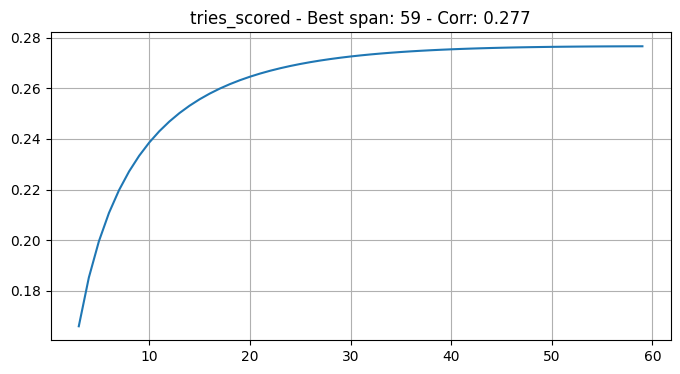

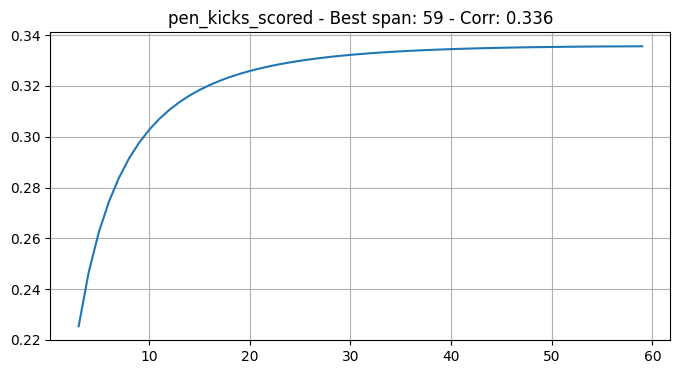

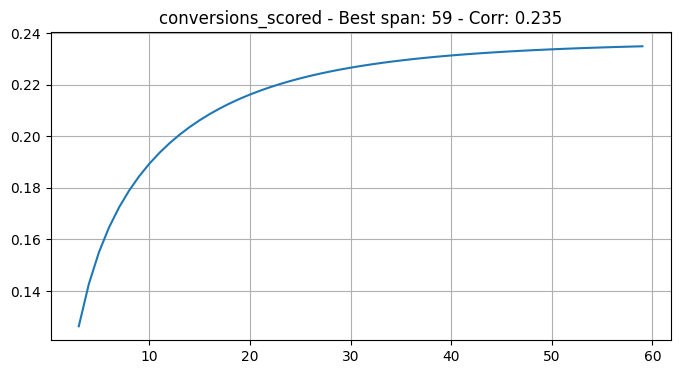

In [29]:

location_df = df.loc[df['team_location']=='Home'].copy()

location_df = df.copy()


for feature in ['tries_scored', 'pen_kicks_scored', 'conversions_scored']:
    corrs = []
    spans = []
    highest_corr = 0
    best_span = 3
    
    for s in range(3, 60):
        temp_span = location_df.groupby('team')[[feature]].ewm(span=s, min_periods=6).mean().groupby(level=0).shift(periods=1).reset_index() \
                                                        .rename(columns={"level_1":"row_index",
                                                                          feature: f"ewm_{feature}_last_{s}"})
        temp_span.index = temp_span['row_index']
        temp_span = temp_span.sort_index()
    
        span_testing_df = pd.concat([temp_span, location_df[[feature, 'match_date_dt']]], axis=1)
        span_testing_df = span_testing_df.loc[span_testing_df['match_date_dt'] < '2024-11-29']
        span_testing_df = span_testing_df.dropna()
    
        corr_ = span_testing_df[[f'ewm_{feature}_last_{s}', feature]].corr().iloc[0].iloc[1]
    
        
        # lr = LogisticRegression()
        # X = span_testing_df[[f'ewm_tries_scored_last_{s}']]
        # y = span_testing_df['tries_scored']
        # kfold = StratifiedKFold(n_splits=5)
        # ave_cv_score = cross_val_score(lr, X, y, scoring='neg_log_loss', cv=kfold).mean()
        # print(ave_cv_score*-1)
    
        spans.append(s)
        corrs.append(corr_)

        if corr_ > highest_corr:
            highest_corr = corr_
            best_span = s
        
    plt.figure(figsize=(8,4))
    plt.plot(spans, corrs)
    plt.grid(True)
    plt.title(f"{feature} - Best span: {best_span} - Corr: {round(highest_corr, 3)}")
    plt.show()
    print()

In [25]:
def get_window_average(df, feature, window_size):

    temp = df.copy()
    feature_name = f"{feature}_last_{window_size}"
    last_n_avg = temp.groupby('team')[[feature]].rolling(window_size, closed='left').mean().reset_index().rename(columns={"level_1":"row_index",
                                                                                                            f"{feature}": feature_name})
    last_n_avg.index = last_n_avg['row_index']
    last_n_avg = last_n_avg.sort_index()

    return last_n_avg[[feature_name]]

In [26]:
def get_feature_ewm(df, feature, span, location=''):

    temp = df.copy()
    feature_name = f"{feature}_ewm_span_{span}_{location}"
    
    last_n_avg = df.groupby('team')[[feature]].ewm(span=span, min_periods=8).mean().groupby(level=0).shift(periods=1).reset_index() \
                                                        .rename(columns={"level_1":"row_index", feature: feature_name})

    last_n_avg.index = last_n_avg['row_index']
    last_n_avg = last_n_avg.sort_index()

    return last_n_avg[[feature_name]]

# Home and Away team ewm for tries, penalties and conversions for all games played

In [30]:
ewm_tries_scored = get_feature_ewm(df, 'tries_scored', 59, location='all_games')
ewm_pen_kicks_scored = get_feature_ewm(df, 'pen_kicks_scored', 59, location='all_games')
ewm_conversions_scored = get_feature_ewm(df, 'conversions_scored', 59, location='all_games')

ewm_tries_conceded = get_feature_ewm(df, 'tries_conceded', 59, location='all_games')
ewm_pen_kicks_conceded = get_feature_ewm(df, 'pen_kicks_conceded', 59, location='all_games')
ewm_conversions_conceded = get_feature_ewm(df, 'conversions_conceded', 59, location='all_games')


ewm_scored = pd.concat([ewm_tries_scored, ewm_pen_kicks_scored, ewm_conversions_scored,
                        ewm_tries_conceded, ewm_pen_kicks_conceded, ewm_conversions_conceded
                                 ], axis=1)

ewm_scored.tail()

,tries_scored_ewm_span_59_all_games,pen_kicks_scored_ewm_span_59_all_games,conversions_scored_ewm_span_59_all_games,tries_conceded_ewm_span_59_all_games,pen_kicks_conceded_ewm_span_59_all_games,conversions_conceded_ewm_span_59_all_games
row_index,,,,,,
3481,4.277116,0.999659,3.312949,3.542074,1.313898,2.555016
3482,4.110026,1.721887,3.111016,2.212424,1.500322,1.700090
3483,3.462906,1.815508,2.468886,2.739895,1.468985,1.899351
3484,3.230463,1.081323,2.424602,3.312194,1.031762,2.326285
3485,4.452562,0.841831,3.376297,2.142513,1.342022,1.433682


In [31]:
# split out home and away
temp = pd.concat([df[['match_per_row_index', 'team', 'opponents', 'team_location']],
                 ewm_scored],
                 axis=1).sort_values('match_per_row_index')

home_team_all_games_ewm = temp.loc[temp['team_location']=='Home']
home_team_all_games_ewm.columns = ['home_team_' + i if 'ewm' in i else i for i in home_team_all_games_ewm.columns]
home_team_all_games_ewm.index = home_team_all_games_ewm['match_per_row_index']
home_team_all_games_ewm.sort_index().tail()

,match_per_row_index,team,opponents,team_location,home_team_tries_scored_ewm_span_59_all_games,home_team_pen_kicks_scored_ewm_span_59_all_games,home_team_conversions_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,home_team_pen_kicks_conceded_ewm_span_59_all_games,home_team_conversions_conceded_ewm_span_59_all_games
match_per_row_index,,,,,,,,,,
1738,1738,GLASGOW,SALE,Home,3.850584,0.489074,3.005729,2.311760,1.588846,1.623901
1739,1739,RACING 92,HARLEQUINS,Home,2.874152,1.844905,2.174844,2.801212,2.071172,2.114744
1740,1740,BORDEAUX,LEICESTER,Home,3.462906,1.815508,2.468886,2.739895,1.468985,1.899351
1741,1741,TOULOUSE,ULSTER,Home,4.110026,1.721887,3.111016,2.212424,1.500322,1.700090
1742,1742,BRISTOL,LEINSTER,Home,4.277116,0.999659,3.312949,3.542074,1.313898,2.555016


In [32]:
away_team_all_games_ewm = temp.loc[temp['team_location']=='Away']
away_team_all_games_ewm.columns = ['away_team_' + i if 'ewm' in i else i for i in away_team_all_games_ewm.columns]
away_team_all_games_ewm.index = away_team_all_games_ewm['match_per_row_index']
away_team_all_games_ewm.sort_index().tail()

,match_per_row_index,team,opponents,team_location,away_team_tries_scored_ewm_span_59_all_games,away_team_pen_kicks_scored_ewm_span_59_all_games,away_team_conversions_scored_ewm_span_59_all_games,away_team_tries_conceded_ewm_span_59_all_games,away_team_pen_kicks_conceded_ewm_span_59_all_games,away_team_conversions_conceded_ewm_span_59_all_games
match_per_row_index,,,,,,,,,,
1738,1738,SALE,GLASGOW,Away,3.302507,1.297744,2.360703,3.076220,1.469099,2.120780
1739,1739,HARLEQUINS,RACING 92,Away,4.030710,0.502394,3.065855,3.809613,1.085405,2.903196
1740,1740,LEICESTER,BORDEAUX,Away,3.249953,1.454256,2.373210,3.022888,1.226222,2.103471
1741,1741,ULSTER,TOULOUSE,Away,3.230463,1.081323,2.424602,3.312194,1.031762,2.326285
1742,1742,LEINSTER,BRISTOL,Away,4.452562,0.841831,3.376297,2.142513,1.342022,1.433682


# Home team ewm for tries, penalties and conversions for only home games played

In [33]:

home_games_only_df = df.loc[df['team_location']=='Home']
ewm_tries_scored_home = get_feature_ewm(home_games_only_df, 'tries_scored', 33, location='home_games')
ewm_pen_kicks_scored_home = get_feature_ewm(home_games_only_df, 'pen_kicks_scored', 27, location='home_games')
ewm_conversions_scored_home = get_feature_ewm(home_games_only_df, 'conversions_scored', 56, location='home_games')

ewm_tries_conceded_home = get_feature_ewm(home_games_only_df, 'tries_conceded', 33, location='home_games')
ewm_pen_kicks_conceded_home = get_feature_ewm(home_games_only_df, 'pen_kicks_conceded', 27, location='home_games')
ewm_conversions_conceded_home = get_feature_ewm(home_games_only_df, 'conversions_conceded', 56, location='home_games')


home_team_home_games_ewm = pd.concat([ewm_tries_scored_home, ewm_pen_kicks_scored_home, ewm_conversions_scored_home,
                                     ewm_tries_conceded_home, ewm_pen_kicks_conceded_home, ewm_conversions_conceded_home], axis=1)

home_team_home_games_ewm.columns = ['home_team_'+i for i in home_team_home_games_ewm.columns]

home_team_home_games_ewm_indexed = pd.concat([df.loc[df['team_location']=='Home'][['match_per_row_index', 'team', 'opponents', 'team_location']],
                                     home_team_home_games_ewm],
                                     axis=1)

home_team_home_games_ewm_indexed.index = home_team_home_games_ewm_indexed['match_per_row_index']

home_team_home_games_ewm_indexed.sort_index().tail()

,match_per_row_index,team,opponents,team_location,home_team_tries_scored_ewm_span_33_home_games,home_team_pen_kicks_scored_ewm_span_27_home_games,home_team_conversions_scored_ewm_span_56_home_games,home_team_tries_conceded_ewm_span_33_home_games,home_team_pen_kicks_conceded_ewm_span_27_home_games,home_team_conversions_conceded_ewm_span_56_home_games
match_per_row_index,,,,,,,,,,
1738,1738,GLASGOW,SALE,Home,3.991533,0.560529,2.918733,1.493732,1.366319,1.040500
1739,1739,RACING 92,HARLEQUINS,Home,3.355978,2.219006,2.804231,2.264394,2.150461,1.783544
1740,1740,BORDEAUX,LEICESTER,Home,4.271835,1.593948,2.898039,1.989690,1.249794,1.409340
1741,1741,TOULOUSE,ULSTER,Home,5.330792,1.431700,3.877247,1.881560,1.399734,1.451432
1742,1742,BRISTOL,LEINSTER,Home,4.798128,1.141615,3.500148,3.619726,1.639651,2.569271


# Away team ewm for tries, penalties and conversions for only home games played

In [34]:
away_games_only_df = df.loc[df['team_location']=='Away']

ewm_tries_scored_away = get_feature_ewm(away_games_only_df, 'tries_scored', 48, location='away_games')
ewm_pen_kicks_scored_away = get_feature_ewm(away_games_only_df, 'pen_kicks_scored', 59, location='away_games')
ewm_conversions_scored_away = get_feature_ewm(away_games_only_df, 'conversions_scored', 59, location='away_games')

ewm_tries_conceded_away = get_feature_ewm(away_games_only_df, 'tries_conceded', 48, location='away_games')
ewm_pen_kicks_conceded_away = get_feature_ewm(away_games_only_df, 'pen_kicks_conceded', 59, location='away_games')
ewm_conversions_conceded_away = get_feature_ewm(away_games_only_df, 'conversions_conceded', 59, location='away_games')


away_team_away_games_ewm = pd.concat([ewm_tries_scored_away, ewm_pen_kicks_scored_away, ewm_conversions_scored_away,
                                     ewm_tries_conceded_away, ewm_pen_kicks_conceded_away, ewm_conversions_conceded_away], axis=1)

away_team_away_games_ewm.columns = ['away_team_'+i for i in away_team_away_games_ewm.columns]

away_team_away_games_ewm_indexed = pd.concat([df.loc[df['team_location']=='Away'][['match_per_row_index', 'team', 'opponents', 'team_location']],
                                     away_team_away_games_ewm],
                                     axis=1)

away_team_away_games_ewm_indexed.index = away_team_away_games_ewm_indexed['match_per_row_index']

away_team_away_games_ewm_indexed.sort_index().tail()

,match_per_row_index,team,opponents,team_location,away_team_tries_scored_ewm_span_48_away_games,away_team_pen_kicks_scored_ewm_span_59_away_games,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games
match_per_row_index,,,,,,,,,,
1738,1738,SALE,GLASGOW,Away,2.671058,1.265182,2.040294,3.665194,1.566258,2.638172
1739,1739,HARLEQUINS,RACING 92,Away,3.917412,0.635854,2.870185,4.014861,1.318514,2.923766
1740,1740,LEICESTER,BORDEAUX,Away,3.032774,1.502025,2.060494,3.424989,1.302351,2.378644
1741,1741,ULSTER,TOULOUSE,Away,2.835522,0.891210,2.121835,3.552788,1.236008,2.549527
1742,1742,LEINSTER,BRISTOL,Away,3.681027,0.898430,2.921962,2.625605,1.240459,1.644492


In [38]:
ml_df = pd.concat([raw_df[['match_date_dt', 'match_date_time_dt', 'home_team', 'away_team', 'outcome',
                            'home_forwards_average_age', 'home_backs_average_age',
                            'away_forwards_average_age', 'away_backs_average_age',
                            'home_tallest_player', 'home_pack_weight_kg',
                            'away_tallest_player', 'away_pack_weight_kg'
                           ]],
                    home_team_all_games_ewm,
                    away_team_all_games_ewm,

                    home_team_home_games_ewm_indexed,
                    away_team_away_games_ewm_indexed
                    ],
                      axis=1
                     ).drop(columns=['match_per_row_index', 'team', 'opponents', 'team_location']).dropna()

ml_df

,match_date_dt,match_date_time_dt,home_team,away_team,outcome,home_forwards_average_age,home_backs_average_age,away_forwards_average_age,away_backs_average_age,home_tallest_player,...,home_team_conversions_scored_ewm_span_56_home_games,home_team_tries_conceded_ewm_span_33_home_games,home_team_pen_kicks_conceded_ewm_span_27_home_games,home_team_conversions_conceded_ewm_span_56_home_games,away_team_tries_scored_ewm_span_48_away_games,away_team_pen_kicks_scored_ewm_span_59_away_games,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games
246,2022-01-15,2022-01-15 14:00:00,WASPS,TOULOUSE,1,26,26,27,26,201,...,2.346208,3.278073,1.572111,1.769428,1.908444,2.081907,1.529201,1.609957,1.868696,1.126468
256,2022-01-21,2022-01-21 21:00:00,HARLEQUINS,CASTRES,1,26,24,27,27,199,...,3.570425,2.713920,1.325825,2.087489,1.761621,1.607865,1.386354,2.435656,3.868462,1.961046
271,2022-01-29,2022-01-29 15:00:00,BORDEAUX,CASTRES,1,29,27,26,29,204,...,2.340676,1.390660,1.632753,1.111048,2.184258,1.657573,1.337379,2.770325,3.504851,2.219507
278,2022-01-29,2022-01-29 17:00:00,LA ROCHELLE,MONTPELLIER,-1,28,27,27,26,200,...,3.099185,1.026554,1.405552,0.704140,1.826397,2.954050,1.381142,4.231993,2.016715,3.435087
291,2022-02-05,2022-02-05 15:00:00,PERPIGNAN,TOULOUSE,1,31,28,29,27,205,...,1.387300,2.188913,2.451454,1.137504,2.050902,1.944762,1.588880,1.791370,2.012102,1.363960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2024-12-07,2024-12-07 21:00:00,GLASGOW,SALE,0,0,0,0,0,0,...,2.918733,1.493732,1.366319,1.040500,2.671058,1.265182,2.040294,3.665194,1.566258,2.638172
1739,2024-12-07,2024-12-07 21:00:00,RACING 92,HARLEQUINS,0,0,0,0,0,0,...,2.804231,2.264394,2.150461,1.783544,3.917412,0.635854,2.870185,4.014861,1.318514,2.923766
1740,2024-12-08,2024-12-08 14:00:00,BORDEAUX,LEICESTER,0,0,0,0,0,0,...,2.898039,1.989690,1.249794,1.409340,3.032774,1.502025,2.060494,3.424989,1.302351,2.378644
1741,2024-12-08,2024-12-08 16:15:00,TOULOUSE,ULSTER,0,0,0,0,0,0,...,3.877247,1.881560,1.399734,1.451432,2.835522,0.891210,2.121835,3.552788,1.236008,2.549527


In [39]:
ml_df.tail(20)

,match_date_dt,match_date_time_dt,home_team,away_team,outcome,home_forwards_average_age,home_backs_average_age,away_forwards_average_age,away_backs_average_age,home_tallest_player,...,home_team_conversions_scored_ewm_span_56_home_games,home_team_tries_conceded_ewm_span_33_home_games,home_team_pen_kicks_conceded_ewm_span_27_home_games,home_team_conversions_conceded_ewm_span_56_home_games,away_team_tries_scored_ewm_span_48_away_games,away_team_pen_kicks_scored_ewm_span_59_away_games,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games
1723,2024-11-30,2024-11-30 18:30:00,CONNACHT,BULLS,-1,29,26,27,27,201,...,2.413060,2.773486,1.075074,1.735837,2.958715,1.365266,2.377962,3.181968,1.740032,2.387173
1724,2024-11-30,2024-11-30 18:45:00,BATH,EXETER,1,28,28,26,25,198,...,2.625177,2.776441,1.318298,2.025241,2.862906,0.709546,2.103641,4.103712,1.327636,3.048922
1725,2024-11-30,2024-11-30 20:35:00,EDINBURGH,BENETTON,1,28,26,28,27,200,...,2.625201,2.480810,0.998666,1.799683,2.693417,1.355105,2.056223,4.455713,0.977623,3.321964
1726,2024-11-30,2024-11-30 20:35:00,ZEBRE,OSPREYS,1,25,26,27,25,202,...,1.606925,4.462189,1.037213,3.579935,2.351517,0.862777,1.732525,4.164518,1.298361,2.818339
1727,2024-11-30,2024-11-30 20:35:00,MUNSTER,LIONS,1,27,27,26,26,201,...,2.947639,2.230716,0.841959,1.698535,2.136452,1.707813,1.839683,3.140982,1.148220,2.376724
1728,2024-11-30,2024-11-30 21:05:00,PERPIGNAN,TOULON,-1,28,28,28,28,202,...,2.368766,2.002598,2.001210,1.413050,1.540955,2.422722,1.177638,2.577914,2.345890,2.013521
1729,2024-12-01,2024-12-01 16:15:00,SALE,LEICESTER,1,27,26,27,28,201,...,2.651972,2.263882,1.283898,1.349734,3.034434,1.479868,2.063186,3.294568,1.315804,2.350998
1730,2024-12-01,2024-12-01 21:05:00,BAYONNE,PARIS,1,29,28,27,26,202,...,2.068884,1.980932,1.780136,1.427946,1.556313,2.221480,1.131387,3.238915,2.422773,2.404937
1731,2024-12-06,2024-12-06 21:00:00,BATH,LA ROCHELLE,1,28,28,28,30,198,...,2.595994,2.726029,1.294225,1.977383,2.172893,2.138995,1.788008,2.726172,2.646813,1.800029
1732,2024-12-07,2024-12-07 14:00:00,CLERMONT,BENETTON,0,0,0,0,0,0,...,3.177449,2.126898,2.042645,1.727022,2.823231,1.285654,2.155843,4.598905,0.978770,3.459216


# Weather

In [ ]:
stations = Stations()
station_leinster = Point(53.326664, -6.229818, 70) # leinster
station_munster = Point(52.674150, -8.642502, 70) # munster
station_ulster = Point(54.576516, -5.904256, 70) # ulster

station_connacht = Point(53.278934, -9.039673, 70) # connacht
station_connacht.radius = 75000 # stations in galway and claremorris are no longer updated - must reach further

station_glasgow = Point(55.881796, -4.342201, 70) # glasgow
station_edinburgh = Point(55.941118, -3.244226, 70) # edinburgh

station_cardiff = Point(51.479611, -3.183570, 70) # cardiff
station_scarlets = Point(51.678792, -4.127436, 70) # scarlets
station_ospreys = Point(51.642446, -3.934669, 70) # ospreys
station_dragons = Point(51.588206, -2.987812, 70) # dragons

station_zebre = Point(44.825026, 10.332965, 70) # zebre
station_benetton = Point(45.680297, 12.213378, 70) # benetton

station_sharks = Point(-29.824957, 31.029680, 70) # cardiff
station_stormers = Point(-33.903397, 18.411151, 70) # scarlets
station_bulls = Point(-25.753104, 28.222949, 70) # ospreys
station_lions = Point(-26.196434, 28.061684, 70) # dragons

stadium_stations = {
    "LEINSTER": station_leinster,
    "MUNSTER": station_munster,
    "ULSTER": station_ulster,
    "CONNACHT": station_connacht,

    "GLASGOW": station_glasgow,
    "EDINBURGH": station_edinburgh,

    "CARDIFF": station_cardiff,
    "SCARLETS": station_scarlets,
    "OSPREYS": station_ospreys,
    "DRAGONS": station_dragons,

    "ZEBRE": station_zebre,
    "BENETTON": station_benetton,
    
    "SHARKS": station_sharks,
    "STORMERS": station_stormers,
    "BULLS": station_bulls,
    "LIONS": station_lions
}

In [ ]:
# define start and end from dataframe of matches
ml_df['match_date_dt'] = pd.to_datetime(ml_df['match_date_dt'])
ml_df['match_date_time_dt'] = pd.to_datetime(ml_df['match_date_time_dt'])

start = ml_df.match_date_dt.min()
end = ml_df.match_date_dt.max() + dt.timedelta(days=1)
# end = datetime.datetime(2024, 12, 1)

dataframes = []

for s in stadium_stations:
    print(stadium_stations[s])
    hourly_data = Hourly(station_leinster, start, end).fetch()
    
    hourly_data['home_team'] = s

    dataframes.append(hourly_data[['home_team', 'prcp', 'temp', 'wspd']])

weather = pd.concat(dataframes)
weather.head()

In [ ]:
def get_match_weather(weather, home_team, datetime_of_match, weather_type):
    team_weather = weather.loc[weather['home_team']==home_team]
    
    # all matches are in french time by default so need to change them to utc to match the weather data
    utc_time_of_match = datetime_of_match.tz_localize("Europe/Paris").tz_convert("UTC") 
    
    # alter time of match to be the beginning of the hour
    time_of_match_hour = utc_time_of_match.replace(minute=0)

    hours_query = [time_of_match_hour, time_of_match_hour + dt.timedelta(hours=1)]
    hours_query = [h.strftime("%Y-%m-%d %H:%M:%S") for h in hours_query]
    
    try:
        out = pd.DataFrame(team_weather.loc[hours_query][['prcp', 'wspd', 'temp']].mean()).T
        return out[weather_type]
    except:
        return -999


ml_df['prcp'] = ml_df.apply(lambda x: get_match_weather(weather, x.home_team, x.match_date_time_dt, 'prcp'), axis=1)
ml_df['wspd'] = ml_df.apply(lambda x: get_match_weather(weather, x.home_team, x.match_date_time_dt, 'wspd'), axis=1)
ml_df['temp'] = ml_df.apply(lambda x: get_match_weather(weather, x.home_team, x.match_date_time_dt, 'temp'), axis=1)

ml_df

In [40]:
# differences in ages, pack weights and tallest player
ml_df['forwards_age_difference'] = ml_df['home_forwards_average_age'] - ml_df['away_forwards_average_age']
ml_df['backs_age_difference'] = ml_df['home_backs_average_age'] - ml_df['away_backs_average_age']

ml_df['tallest_plaer_difference'] = ml_df['home_tallest_player'] - ml_df['away_tallest_player']

ml_df['pack_weight_difference'] = ml_df['home_pack_weight_kg'] - ml_df['away_pack_weight_kg']

ml_df = ml_df.drop(columns=['home_forwards_average_age', 'away_forwards_average_age',
                            'home_backs_average_age', 'away_backs_average_age',
                            'home_tallest_player', 'away_tallest_player',
                            'home_pack_weight_kg', 'away_pack_weight_kg'])

ml_df

,match_date_dt,match_date_time_dt,home_team,away_team,outcome,home_team_tries_scored_ewm_span_59_all_games,home_team_pen_kicks_scored_ewm_span_59_all_games,home_team_conversions_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,home_team_pen_kicks_conceded_ewm_span_59_all_games,...,away_team_tries_scored_ewm_span_48_away_games,away_team_pen_kicks_scored_ewm_span_59_away_games,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games,forwards_age_difference,backs_age_difference,tallest_plaer_difference,pack_weight_difference
246,2022-01-15,2022-01-15 14:00:00,WASPS,TOULOUSE,1,2.809567,1.856520,2.193682,3.562282,1.471018,...,1.908444,2.081907,1.529201,1.609957,1.868696,1.126468,-1,0,-7,39
256,2022-01-21,2022-01-21 21:00:00,HARLEQUINS,CASTRES,1,3.867822,0.791912,2.960411,2.606312,1.534341,...,1.761621,1.607865,1.386354,2.435656,3.868462,1.961046,-1,-3,-1,-23
271,2022-01-29,2022-01-29 15:00:00,BORDEAUX,CASTRES,1,3.027973,2.118160,2.125155,1.641009,2.196217,...,2.184258,1.657573,1.337379,2.770325,3.504851,2.219507,3,-2,6,24
278,2022-01-29,2022-01-29 17:00:00,LA ROCHELLE,MONTPELLIER,-1,3.032073,2.304562,2.248174,1.609493,1.986746,...,1.826397,2.954050,1.381142,4.231993,2.016715,3.435087,1,1,2,-5
291,2022-02-05,2022-02-05 15:00:00,PERPIGNAN,TOULOUSE,1,1.499853,2.462401,1.240290,2.846257,2.457605,...,2.050902,1.944762,1.588880,1.791370,2.012102,1.363960,2,1,-3,-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2024-12-07,2024-12-07 21:00:00,GLASGOW,SALE,0,3.850584,0.489074,3.005729,2.311760,1.588846,...,2.671058,1.265182,2.040294,3.665194,1.566258,2.638172,0,0,0,0
1739,2024-12-07,2024-12-07 21:00:00,RACING 92,HARLEQUINS,0,2.874152,1.844905,2.174844,2.801212,2.071172,...,3.917412,0.635854,2.870185,4.014861,1.318514,2.923766,0,0,0,0
1740,2024-12-08,2024-12-08 14:00:00,BORDEAUX,LEICESTER,0,3.462906,1.815508,2.468886,2.739895,1.468985,...,3.032774,1.502025,2.060494,3.424989,1.302351,2.378644,0,0,0,0
1741,2024-12-08,2024-12-08 16:15:00,TOULOUSE,ULSTER,0,4.110026,1.721887,3.111016,2.212424,1.500322,...,2.835522,0.891210,2.121835,3.552788,1.236008,2.549527,0,0,0,0


In [42]:
def north_to_southern_hem_indicator(home_team, away_team):
    saffa_teams = ['SHARKS', 'STORMERS', 'LIONS', 'BULLS']
    if home_team in saffa_teams and away_team not in saffa_teams:
        return 1 
    else:
        return 0

ml_df['north_to_southern_hem_ind'] = ml_df.apply(lambda x: north_to_southern_hem_indicator(x.home_team, x.away_team), axis=1)


def south_to_northern_hem_indicator(home_team, away_team):
    saffa_teams = ['SHARKS', 'STORMERS', 'LIONS', 'BULLS']
    if home_team not in saffa_teams and away_team in saffa_teams:
        return 1 
    else:
        return 0

ml_df['south_to_northern_hem_ind'] = ml_df.apply(lambda x: south_to_northern_hem_indicator(x.home_team, x.away_team), axis=1)

ml_df.tail(20)

,match_date_dt,match_date_time_dt,home_team,away_team,outcome,home_team_tries_scored_ewm_span_59_all_games,home_team_pen_kicks_scored_ewm_span_59_all_games,home_team_conversions_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,home_team_pen_kicks_conceded_ewm_span_59_all_games,...,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games,forwards_age_difference,backs_age_difference,tallest_plaer_difference,pack_weight_difference,north_to_southern_hem_ind,south_to_northern_hem_ind
1723,2024-11-30,2024-11-30 18:30:00,CONNACHT,BULLS,-1,3.269043,0.980465,2.257163,3.471038,1.150378,...,2.377962,3.181968,1.740032,2.387173,2,-1,0,-42,0,1
1724,2024-11-30,2024-11-30 18:45:00,BATH,EXETER,1,3.855154,1.137489,2.778710,3.342090,1.100514,...,2.103641,4.103712,1.327636,3.048922,2,3,1,14,0,0
1725,2024-11-30,2024-11-30 20:35:00,EDINBURGH,BENETTON,1,2.984568,1.380119,2.291107,3.049140,1.105418,...,2.056223,4.455713,0.977623,3.321964,0,-1,-1,15,0,0
1726,2024-11-30,2024-11-30 20:35:00,ZEBRE,OSPREYS,1,2.167311,1.153586,1.377162,5.095779,0.754379,...,1.732525,4.164518,1.298361,2.818339,-2,1,-2,22,0,0
1727,2024-11-30,2024-11-30 20:35:00,MUNSTER,LIONS,1,3.438544,0.959019,2.493563,2.625510,1.235682,...,1.839683,3.140982,1.148220,2.376724,1,1,1,-37,0,1
1728,2024-11-30,2024-11-30 21:05:00,PERPIGNAN,TOULON,-1,2.519433,1.991080,1.904204,3.104571,1.941275,...,1.177638,2.577914,2.345890,2.013521,0,0,0,-6,0,0
1729,2024-12-01,2024-12-01 16:15:00,SALE,LEICESTER,1,3.203766,1.308643,2.337302,3.079010,1.449666,...,2.063186,3.294568,1.315804,2.350998,0,-2,-2,-40,0,0
1730,2024-12-01,2024-12-01 21:05:00,BAYONNE,PARIS,1,2.718627,1.852319,2.123112,3.214156,1.710871,...,1.131387,3.238915,2.422773,2.404937,2,2,3,90,0,0
1731,2024-12-06,2024-12-06 21:00:00,BATH,LA ROCHELLE,1,3.824469,1.096673,2.750767,3.293932,1.096907,...,1.788008,2.726172,2.646813,1.800029,0,-2,-5,8,0,0
1732,2024-12-07,2024-12-07 14:00:00,CLERMONT,BENETTON,0,3.091799,1.625789,2.354244,2.875539,2.109610,...,2.155843,4.598905,0.978770,3.459216,0,0,0,0,0,0


In [45]:
ml_df.dtypes

match_date_dt                                             object
match_date_time_dt                                        object
home_team                                                 object
away_team                                                 object
outcome                                                    int64
home_team_tries_scored_ewm_span_59_all_games             float64
home_team_pen_kicks_scored_ewm_span_59_all_games         float64
home_team_conversions_scored_ewm_span_59_all_games       float64
home_team_tries_conceded_ewm_span_59_all_games           float64
home_team_pen_kicks_conceded_ewm_span_59_all_games       float64
home_team_conversions_conceded_ewm_span_59_all_games     float64
away_team_tries_scored_ewm_span_59_all_games             float64
away_team_pen_kicks_scored_ewm_span_59_all_games         float64
away_team_conversions_scored_ewm_span_59_all_games       float64
away_team_tries_conceded_ewm_span_59_all_games           float64
away_team_pen_kicks_conce

In [47]:
ml_df['tries_scored_all_games_difference'] = ml_df['home_team_tries_scored_ewm_span_59_all_games'] - ml_df['away_team_tries_scored_ewm_span_59_all_games']

ml_df['tries_conceded_all_games_difference'] = ml_df['home_team_tries_conceded_ewm_span_59_all_games'] - ml_df['away_team_tries_conceded_ewm_span_59_all_games']


ml_df['tries_scored_home_vs_tries_conceded_away'] = ml_df['home_team_tries_scored_ewm_span_33_home_games'] * ml_df['away_team_tries_conceded_ewm_span_48_away_games']
ml_df['tries_scored_away_vs_tries_conceded_home'] = ml_df['away_team_tries_scored_ewm_span_48_away_games'] * ml_df['home_team_tries_conceded_ewm_span_33_home_games']

ml_df.tail(20)

,match_date_dt,match_date_time_dt,home_team,away_team,outcome,home_team_tries_scored_ewm_span_59_all_games,home_team_pen_kicks_scored_ewm_span_59_all_games,home_team_conversions_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,home_team_pen_kicks_conceded_ewm_span_59_all_games,...,forwards_age_difference,backs_age_difference,tallest_plaer_difference,pack_weight_difference,north_to_southern_hem_ind,south_to_northern_hem_ind,tries_scored_all_games_difference,tries_conceded_all_games_difference,tries_scored_home_vs_tries_conceded_away,tries_scored_away_vs_tries_conceded_home
1723,2024-11-30,2024-11-30 18:30:00,CONNACHT,BULLS,-1,3.269043,0.980465,2.257163,3.471038,1.150378,...,2,-1,0,-42,0,1,-0.871731,0.444455,11.606874,8.205956
1724,2024-11-30,2024-11-30 18:45:00,BATH,EXETER,1,3.855154,1.137489,2.778710,3.342090,1.100514,...,2,3,1,14,0,0,0.404385,-0.309026,15.795834,7.948690
1725,2024-11-30,2024-11-30 20:35:00,EDINBURGH,BENETTON,1,2.984568,1.380119,2.291107,3.049140,1.105418,...,0,-1,-1,15,0,0,0.067685,-0.427402,17.332276,6.681854
1726,2024-11-30,2024-11-30 20:35:00,ZEBRE,OSPREYS,1,2.167311,1.153586,1.377162,5.095779,0.754379,...,-2,1,-2,22,0,0,-0.624098,1.691054,10.036712,10.492914
1727,2024-11-30,2024-11-30 20:35:00,MUNSTER,LIONS,1,3.438544,0.959019,2.493563,2.625510,1.235682,...,1,1,1,-37,0,1,0.075534,-0.507659,12.080912,4.765817
1728,2024-11-30,2024-11-30 21:05:00,PERPIGNAN,TOULON,-1,2.519433,1.991080,1.904204,3.104571,1.941275,...,0,0,0,-6,0,0,-0.111733,0.735838,8.066259,3.085914
1729,2024-12-01,2024-12-01 16:15:00,SALE,LEICESTER,1,3.203766,1.308643,2.337302,3.079010,1.449666,...,0,-2,-2,-40,0,0,-0.055266,0.164255,12.677863,6.869602
1730,2024-12-01,2024-12-01 21:05:00,BAYONNE,PARIS,1,2.718627,1.852319,2.123112,3.214156,1.710871,...,2,2,3,90,0,0,0.359064,0.573039,8.762373,3.082951
1731,2024-12-06,2024-12-06 21:00:00,BATH,LA ROCHELLE,1,3.824469,1.096673,2.750767,3.293932,1.096907,...,0,-2,-5,8,0,0,0.898177,1.026433,10.343161,5.923369
1732,2024-12-07,2024-12-07 14:00:00,CLERMONT,BENETTON,0,3.091799,1.625789,2.354244,2.875539,2.109610,...,0,0,0,0,0,0,0.095810,-0.734806,20.939749,6.004725


In [ ]:
ml_df

In [48]:
cutoff = '2024-12-06'
X = ml_df.loc[ml_df['match_date_dt'] < cutoff]
X_holdout = ml_df.loc[ml_df['match_date_dt'] >= cutoff]

to_drop = ['match_date_dt', 'match_date_time_dt', 'home_team', 'away_team' ]
X.drop(columns=to_drop, inplace=True)
X_holdout.drop(columns=to_drop, inplace=True)

y = X.pop('outcome')
y_holdout = X_holdout.pop('outcome')

X.shape, X_holdout.shape, y.shape, y_holdout.shape

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


((1312, 34), (12, 34), (1312,), (12,))

In [49]:
X_holdout

,home_team_tries_scored_ewm_span_59_all_games,home_team_pen_kicks_scored_ewm_span_59_all_games,home_team_conversions_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,home_team_pen_kicks_conceded_ewm_span_59_all_games,home_team_conversions_conceded_ewm_span_59_all_games,away_team_tries_scored_ewm_span_59_all_games,away_team_pen_kicks_scored_ewm_span_59_all_games,away_team_conversions_scored_ewm_span_59_all_games,away_team_tries_conceded_ewm_span_59_all_games,...,forwards_age_difference,backs_age_difference,tallest_plaer_difference,pack_weight_difference,north_to_southern_hem_ind,south_to_northern_hem_ind,tries_scored_all_games_difference,tries_conceded_all_games_difference,tries_scored_home_vs_tries_conceded_away,tries_scored_away_vs_tries_conceded_home
1731,3.824469,1.096673,2.750767,3.293932,1.096907,2.456044,2.926292,1.810644,2.238825,2.267499,...,0,-2,-5,8,0,0,0.898177,1.026433,10.343161,5.923369
1732,3.091799,1.625789,2.354244,2.875539,2.109610,2.270909,2.995989,1.399112,2.144090,3.610345,...,0,0,0,0,0,0,0.095810,-0.734806,20.939749,6.004725
1733,3.101870,1.156471,2.375959,3.341427,1.214813,2.438394,3.399832,0.827652,2.572431,3.628255,...,0,0,0,0,1,0,-0.297962,-0.286828,15.138138,8.092781
1734,3.932318,1.232318,2.982078,3.387881,1.177335,2.568465,2.591779,2.440237,1.945514,2.933916,...,0,0,0,0,0,0,1.340539,0.453965,18.600027,6.182969
1735,3.144746,1.493462,2.292828,2.772734,1.076530,2.095853,2.574451,2.456278,2.056974,2.321143,...,0,0,0,0,1,0,0.570295,0.451591,9.249456,3.862026
1736,3.727133,1.767527,2.380054,3.116472,1.397456,2.240636,4.135722,1.431243,3.303552,2.989746,...,0,0,0,0,0,1,-0.408589,0.126726,14.813644,8.439340
1737,3.423026,0.925084,2.440713,2.567991,1.227342,1.902432,2.312663,1.948963,1.672817,2.619002,...,0,0,0,0,0,0,1.110363,-0.051011,12.061712,3.292292
1738,3.850584,0.489074,3.005729,2.311760,1.588846,1.623901,3.302507,1.297744,2.360703,3.076220,...,0,0,0,0,0,0,0.548076,-0.764460,14.629744,3.989843
1739,2.874152,1.844905,2.174844,2.801212,2.071172,2.114744,4.030710,0.502394,3.065855,3.809613,...,0,0,0,0,0,0,-1.156557,-1.008401,13.473783,8.870566
1740,3.462906,1.815508,2.468886,2.739895,1.468985,1.899351,3.249953,1.454256,2.373210,3.022888,...,0,0,0,0,0,0,0.212953,-0.282993,14.630987,6.034280


In [50]:

scalar = StandardScaler()
clf = LogisticRegression(C = 0.01)

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

folds = 5
cv = KFold(n_splits=(folds - 1))

scores = cross_val_score(pipeline,
                         X, 
                         y, 
                         scoring='neg_log_loss', 
                         cv = cv)

print(round(scores.mean(), 3))


-0.614


In [ ]:
# NOT CONVERGING DESPITE INCREASING MAX_ITER TO LARGE NUBERS

# folds = 5

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/folds), random_state=11, stratify=y)

# scalar = StandardScaler()
# log = LogisticRegression(solver='lbfgs', max_iter=1000)

# pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

# cv = KFold(n_splits=(folds - 1))

# parameters = {
#     'C': np.arange(0.2, 1.2, 0.2)
# }
# clf = GridSearchCV(log, parameters)
# clf.fit(X, y)

# sorted(clf.cv_results_.keys())



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=11, stratify=y)

scalar = StandardScaler()
clf = LogisticRegression(C = 0.01, class_weight='balanced')

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

fitted_pipeline = pipeline.fit(X_train, y_train)

fitted_pipeline.predict(X_test)

array([ 1,  1, -1, -1, -1, -1, -1, -1,  1,  0,  1,  0,  1,  0,  1, -1, -1,
        1,  0,  1, -1, -1,  0, -1, -1,  1,  1,  0, -1,  0,  1,  1, -1,  1,
        0,  0, -1,  0,  1,  0,  1, -1,  0, -1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1,  0,  1,  0,  1,  1,  1,  1,  1,  0, -1,  1,  0,  0])

In [52]:
scalar = StandardScaler()
clf = LogisticRegression(C = 0.01)

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

fitted_pipeline = pipeline.fit(X, y)

fitted_pipeline.predict(X_holdout)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [ ]:
X_holdout_indices

In [53]:
X_holdout_indices = X_holdout.index

results_df = ml_df.loc[X_holdout_indices]
results_df['preds'] = fitted_pipeline.predict(X_holdout)

# outcome values:
# 1 = home win   index=2
# 0 = draw       index=1
# -1 = away win  index=0


results_df['home_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 2]
results_df['away_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 0]
results_df['draw_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]

results_df = results_df[['match_date_dt', 'home_team', 'away_team', 'preds', 'home_win_prob', 'away_win_prob']]

results_df['home_win_odds'] = 1/results_df['home_win_prob']
results_df['away_win_odds'] = 1/results_df['away_win_prob']

round(results_df, 2)

,match_date_dt,home_team,away_team,preds,home_win_prob,away_win_prob,home_win_odds,away_win_odds
1731,2024-12-06,BATH,LA ROCHELLE,1,0.60,0.38,1.68,2.67
1732,2024-12-07,CLERMONT,BENETTON,1,0.84,0.15,1.20,6.57
1733,2024-12-07,SHARKS,EXETER,1,0.76,0.23,1.32,4.44
1734,2024-12-07,NORTHAMPTON,CASTRES,1,0.82,0.15,1.21,6.58
1735,2024-12-07,STORMERS,TOULON,1,0.73,0.25,1.37,4.04
1736,2024-12-07,SARACENS,BULLS,1,0.65,0.33,1.53,3.05
1737,2024-12-07,MUNSTER,PARIS,1,0.79,0.19,1.27,5.31
1738,2024-12-07,GLASGOW,SALE,1,0.82,0.17,1.22,5.93
1739,2024-12-07,RACING 92,HARLEQUINS,1,0.70,0.28,1.42,3.51
1740,2024-12-08,BORDEAUX,LEICESTER,1,0.76,0.22,1.31,4.49


In [55]:
pd.DataFrame({'coef_': pipeline['estimator'].coef_[0],
             'col': X_holdout.columns}).sort_values('coef_', ascending=False).tail(20)

,coef_,col
33,-0.019432,tries_scored_away_vs_tries_conceded_home
14,-0.019884,home_team_conversions_scored_ewm_span_56_home_...
21,-0.021673,away_team_tries_conceded_ewm_span_48_away_games
0,-0.029568,home_team_tries_scored_ewm_span_59_all_games
12,-0.030627,home_team_tries_scored_ewm_span_33_home_games
29,-0.034151,south_to_northern_hem_ind
25,-0.034187,backs_age_difference
27,-0.034282,pack_weight_difference
4,-0.036384,home_team_pen_kicks_conceded_ewm_span_59_all_g...
26,-0.041249,tallest_plaer_difference


In [ ]:
scalar = StandardScaler()
clf = LogisticRegression()

pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

fitted_pipeline = pipeline.fit(X, y)



In [ ]:
X_holdout

In [ ]:
fitted_pipeline.predict(X_holdout)

In [ ]:
pred = fitted_pipeline.predict(X_holdout)
X_holdout['prob_1'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]
X_holdout['pred'] = pred


In [ ]:
# pass a date to function
# use date to calculate the team attack and defense strengths up to but not including that date
# assumes match data is already read it

def get_team_strengths(team_per_row_matches, # match level data to use
                      end_date, # last date to consider 
                      use_all_seasons=True
                      ):
    # match data to use
    df = team_per_row_matches.loc[team_per_row_matches['Match Date'] < end_date]
    df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])
    df = df.reset_index(drop=True)
    
    # average tries scored home and away
    home_avg_tries_scored = df.groupby('Team Location')['Tries Scored'].mean()['Home Team']
    away_avg_tries_scored = df.groupby('Team Location')['Tries Scored'].mean()['Away Team']
    
    # average tries conceded home and away
    home_avg_tries_conceded = df.groupby('Team Location')['Tries Conceded'].mean()['Home Team']
    away_avg_tries_conceded = df.groupby('Team Location')['Tries Conceded'].mean()['Away Team']
    

    # we need to recalculate our tries scored averages up until the 5th round of 23/24
    train_tries_scored_by_team = df.groupby(["Team", "Team Location"])['Tries Scored'].mean() \
                                    .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False]) \
                                    .pivot(index = ['Team'], columns='Team Location', values='Tries Scored').reset_index().rename_axis(None, axis=1)
    
    train_tries_scored_by_team.rename(columns={"Home Team": "Average Tries Scored Home",
                                                      "Away Team": "Average Tries Scored Away"}, inplace=True)


    # we need to recalculate our tries conceded averages up until the 5th round of 23/24
    train_tries_conceded_by_team = df.groupby(["Team", "Team Location"])['Tries Conceded'].mean() \
                                        .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False]) \
                                        .pivot(index = ['Team'], columns='Team Location', values='Tries Conceded').reset_index().rename_axis(None, axis=1)

    train_tries_conceded_by_team.rename(columns={"Home Team": "Average Tries Conceded Home",
                                                 "Away Team": "Average Tries Conceded Away"}, inplace=True)

    team_ratings = pd.merge(train_tries_scored_by_team, 
                            train_tries_conceded_by_team)

    # calculate team strengths from averages
    team_ratings['Attack Strength Away'] = team_ratings['Average Tries Scored Away'] / away_avg_tries_scored
    team_ratings['Attack Strength Home'] = team_ratings['Average Tries Scored Home'] / home_avg_tries_scored
    
    team_ratings['Defence Strength Away'] = team_ratings['Average Tries Conceded Away'] / away_avg_tries_conceded
    team_ratings['Defence Strength Home'] = team_ratings['Average Tries Conceded Home'] / home_avg_tries_conceded


    return team_ratings

# filter out any future fixtures, only keep historical results
end_day_filter = "2024-11-28"

team_ratings = get_team_strengths(team_per_row_matches=team_per_row_df,
                                   end_date = end_day_filter)

team_ratings

In [ ]:
fixtures = team_per_row_df.loc[(team_per_row_df['Match Date'] > "2024-11-28") &
                            (team_per_row_df['Match Date'] < "2024-12-02")][['Team', 'Opponents']].values.tolist()
fixtures

# Conversion rate

In [ ]:
common_features = ['pkey', 'match_date_', 'Home team', 'Away team']

# home data
temp1 = raw_df[common_features+['home_n_tries', 'home_n_conversions', 'pen_try_minutes_home']].copy()
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_n_tries": "Tries Scored",
                     "home_n_conversions": "Conversions Scored",
                     "pen_try_minutes_home": "Pen Tries Scored"},
                    inplace=True)

# away data
temp2 = raw_df[common_features + ['away_n_tries', 'away_n_conversions', 'pen_try_minutes_away']].copy()
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_n_tries": "Tries Scored",
                     "away_n_conversions": "Conversions Scored",
                     "pen_try_minutes_away": "Pen Tries Scored"},
                    inplace=True)

# concat dfs together
conversions_df = pd.concat([temp1, temp2])
conversions_df.reset_index(inplace=True, drop=True)

conversions_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

conversions_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

# conversions_df['len_p_tries'] = [len(i) if type(i)==str else 0 for i in conversions_df['Pen Tries Scored']]
conversions_df['p_tries'] = [len(re.findall(r'[\d]+', i)
                                ) if type(i)==str else 0 for i in conversions_df['Pen Tries Scored']]

conversions_df['non_pen_tries_scored'] = conversions_df['Tries Scored'] - conversions_df['p_tries']

conversions_df.sort_values(by='p_tries').tail(5)

In [ ]:
conversion_rate_df = conversions_df.groupby('Team')[['non_pen_tries_scored', 'Conversions Scored']].sum().reset_index()

conversion_rate_df['conversion_rate'] = conversion_rate_df['Conversions Scored'] / conversion_rate_df['non_pen_tries_scored']

conversion_rate_df

In [ ]:
The 'scoring' parameter of cross_val_score must be a str among {'neg_brier_score', 'f1_macro', 'precision_weighted', 'adjusted_mutual_info_score', 'fowlkes_mallows_score', 'max_error', 'jaccard_weighted',
'roc_auc_ovr', 'average_precision', 'f1_weighted', 'adjusted_rand_score', 'neg_mean_gamma_deviance', 'neg_root_mean_squared_error', 'mutual_info_score', 'precision_micro', 'recall', 'recall_samples', 
'recall_micro', 'v_measure_score', 'neg_mean_absolute_percentage_error', 'precision', 'neg_root_mean_squared_log_error', 'jaccard_macro', 'explained_variance', 'positive_likelihood_ratio', 'accuracy', 
'roc_auc_ovo', 'matthews_corrcoef', 'top_k_accuracy', 'jaccard_samples', 'neg_negative_likelihood_ratio', 'roc_auc', 'neg_mean_squared_error', 'homogeneity_score', 'jaccard_micro', 'neg_mean_poisson_deviance',
'neg_mean_squared_log_error', 'jaccard', 'f1_samples', 'neg_log_loss', 'd2_absolute_error_score', 'recall_weighted', 'rand_score', 'neg_median_absolute_error', 'recall_macro', 'completeness_score', 'f1', 
'normalized_mutual_info_score',
'f1_micro', 'precision_samples', 'precision_macro', 'r2', 'roc_auc_ovo_weighted', 'roc_auc_ovr_weighted', 'balanced_accuracy', 'neg_mean_absolute_error'}, a callable or None. Got 'n' instead.